In [1]:
from sklearn.datasets import load_iris, load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Многоклассовая классификация

In [104]:
iris = load_iris(as_frame=True)
X, y = load_iris(return_X_y=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [4]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris.data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [121]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


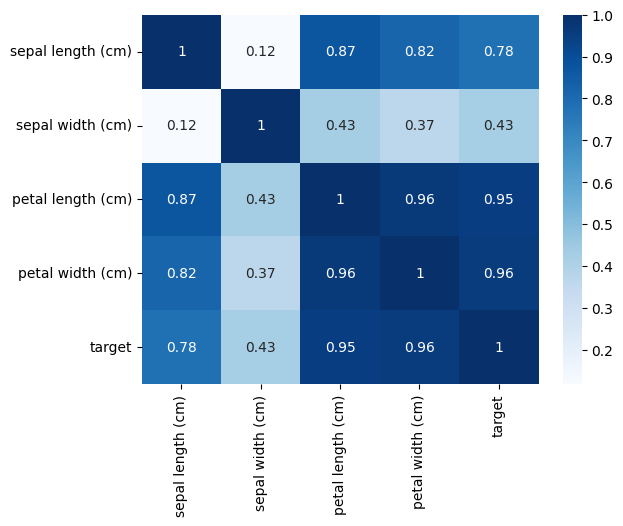

In [122]:
corr = df.corr()
sns.heatmap(abs(corr), annot=True, cmap='Blues')
plt.show()

<Figure size 1000x600 with 0 Axes>

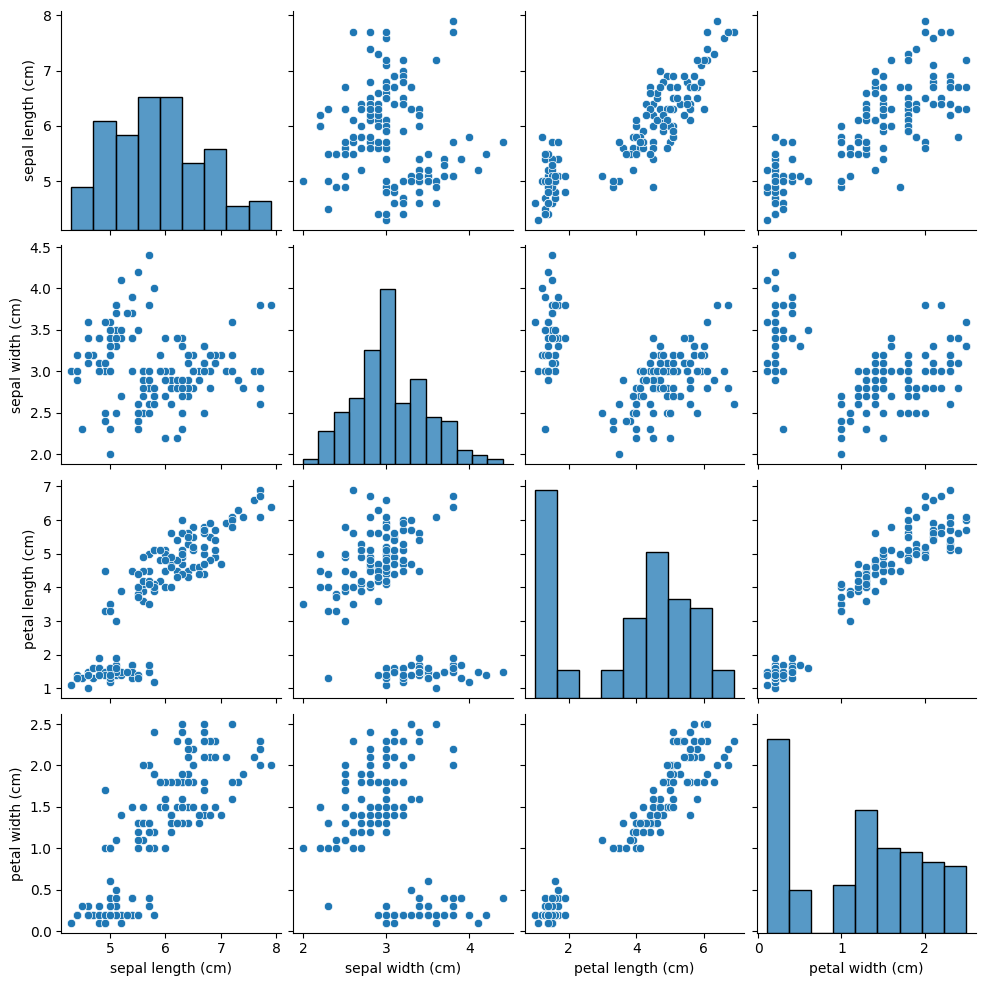

In [107]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df.loc[:,['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
plt.show()

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [108]:
counts = iris.target.value_counts()
counts

0    50
1    50
2    50
Name: target, dtype: int64

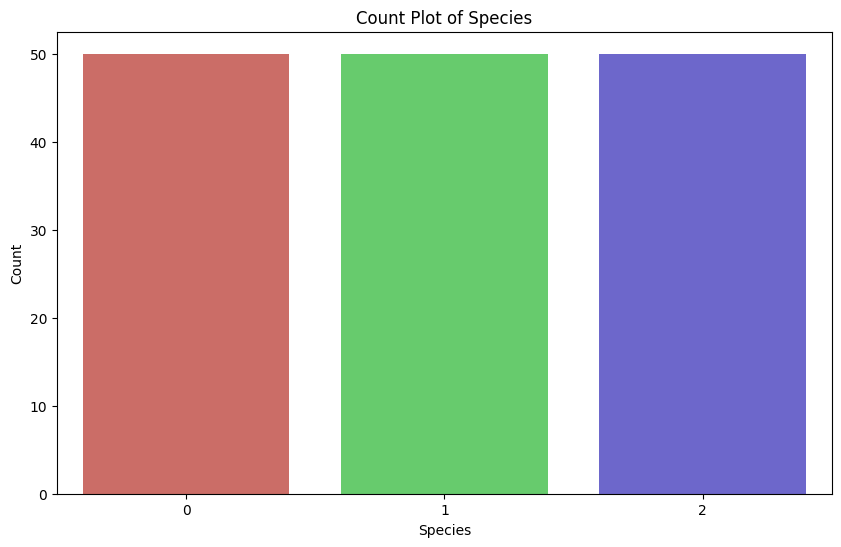

In [44]:
df_barplot = pd.DataFrame({'Species': counts.index, 'Count': counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Species', y='Count', data=df_barplot, palette='hls')
plt.title('Count Plot of Species')
plt.show()

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

features_scaled = scaler.transform(df)
features_scaled = pd.DataFrame(data=features_scaled, columns=df.columns)
df_scaled = pd.concat([features_scaled, iris.target], axis=1)
df_scaled_melt = pd.melt(df_scaled, id_vars='target', var_name='features', value_name='value')
df_scaled_melt.head()

,target,features,value
0,0,sepal length (cm),-0.900681
1,0,sepal length (cm),-1.143017
2,0,sepal length (cm),-1.385353
3,0,sepal length (cm),-1.506521
4,0,sepal length (cm),-1.021849


### После стандартизации значения признаков находятся примерно в одном диапазоне, что может быть полезным для классификации.

C:\Users\Ксения\AppData\Local\Temp\ipykernel_3096\3662614261.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_scaled_copy = df_scaled.drop(['target'], 1)


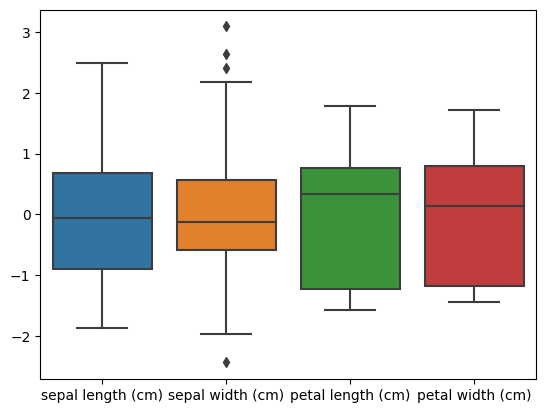

In [46]:
df_scaled_copy = df_scaled.drop(['target'], 1)
sns.boxplot(data=df_scaled_copy)
plt.show()

In [53]:
def violin_plot(features, name):
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    data = df_scaled_melt.query(query)

    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   inner="quart")
    plt.xticks(rotation=90)
    plt.title(name)
    plt.xlabel("Признаки")
    plt.ylabel("Стандартизированные значения")

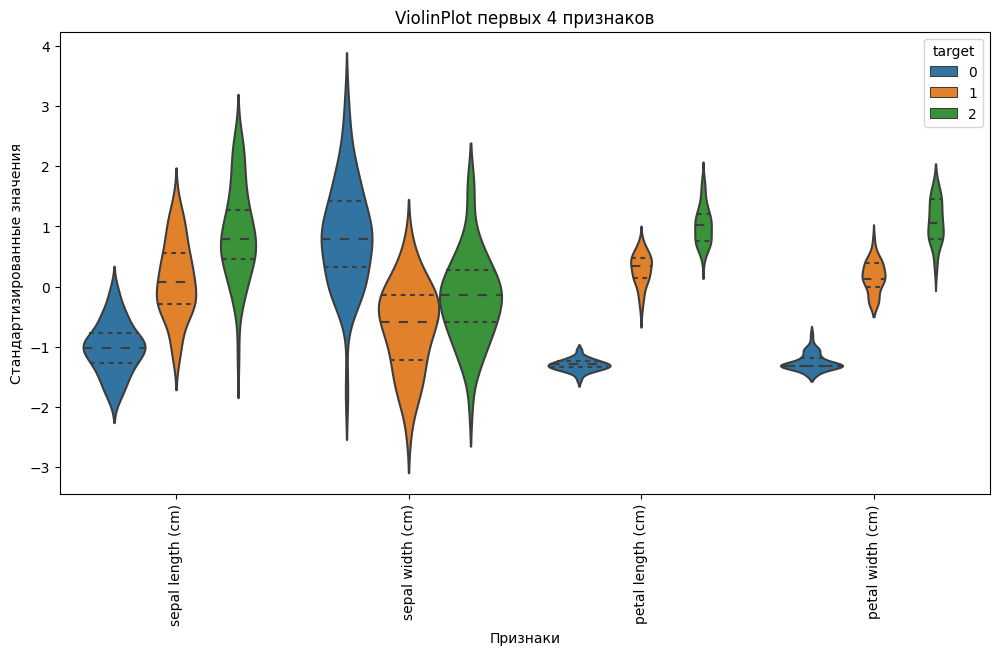

In [54]:
violin_plot(df.columns[0:4], "ViolinPlot 4 признаков")

In [116]:
from sklearn.model_selection import train_test_split

y = iris.target
X = df_scaled.loc[:, ['sepal length (cm)', 'sepal length (cm)', 'petal width (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 3)
(50, 3)
(100,)
(50,)


### <strong>1 случай</strong>. В связи с тем, что признак <strong>sepal width (cm)</strong> имеет выбросы, а также по своим значениям отличается от остальных признаков, то имеет смысл провести классификацию с ним и без него для сравнения.
### <strong>2 случай</strong>. На графике ViolinPlot заметно, что признаки <strong>petal length (cm)</strong> и <strong>petal width (cm)</strong> имеют схожие распределения значений, соответственно несут схожую информацию, что может не очень хорошо влиять на классификацию. Поэтому также имеет смысл сравнить результаты классификации с каким-то из этих признаков и без. 

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy:", acc*100)
print(y_pred)

Logistic Regression model accuracy: 98.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [118]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(y_test, y_pred)
print(conf)

rep = classification_report(y_test, y_pred)
print(rep)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [119]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

y_pred = lasso_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

0.05858566703105942

### При использовании признака <strong>sepal width (cm)</strong>, accuracy - 0.98, значения метрик precision, recall, f1-score соответственно для 0 класса: 1.00, 1.00, 1.00; для 1 класса: 0.94, 1.00, 0.97; для 2 класса: 1.00, 0.94, 0.97. Ошибка MSE - 0.05439586878298166. Значение accuracy логистической регрессии с регуляризацией l1 - 92.0.
### Без <strong>sepal width (cm)</strong>: accuracy - 0.98, значения метрик precision, recall, f1-score соответственно для 0 класса: 1.00, 1.00, 1.00; для 1 класса: 0.94, 1.00, 0.97; для 2 класса: 1.00, 0.94, 0.97. Ошибка MSE - 0.054395871046418326. Значение accuracy логистической регрессии с регуляризацией l1 - 92.0.
#### Можно сделать вывод о том, что выбросы в sepal width не влияют особо. Значения метрик и ошибок одинковое, кроме MSE. Без использования этого признака ошибка выше.
### Классификация без признака <strong>petal width (cm)</strong>: accuracy - 1.00, значения метрик precision, recall, f1-score соответственно для 0 класса: 1.00, 1.00, 1.00; для 1 класса: 1.00, 1.00, 1.00; для 2 класса: 1.00, 1.00, 1.00. Ошибка MSE - 0.07217770728165764. Значение accuracy логистической регрессии с регуляризацией l1 - 94.0.
### Классификация без признака <strong>petal length (cm)</strong>: accuracy - 0.98, значения метрик precision, recall, f1-score соответственно для 0 класса: 1.00, 1.00, 1.00; для 1 класса: 0.94, 1.00, 0.97; для 2 класса: 1.00, 0.94, 0.97. Ошибка MSE - 0.05858566703105942. Значение accuracy логистической регрессии с регуляризацией l1 - 94.0.
#### Можно сделать вывод, что классификация показала лучшие результаты без признака <strong>petal width (cm)</strong>, однако ошибка MSE увеличилась. 

In [120]:
clf = LogisticRegression(penalty='l1', C=1.0, solver = 'liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy:", acc*100)
print(y_pred)

Logistic Regression model accuracy: 94.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 2 1 0 0 1 1 2 1 2]


# Binary classification

In [95]:
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [68]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [89]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

### Злокачественных опухолей - 212 (0), доброкачественных - 357 (1).

In [96]:
df_target = pd.DataFrame(data.target, columns=['target'])
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [91]:
df = pd.concat([df, df_target], axis=1)

In [93]:
df['target'] = df['target'].apply(lambda x: "Benign" if x == 1 else "Malignant")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [94]:
counts = df['target'].value_counts()
counts

Benign       357
Malignant    212
Name: target, dtype: int64

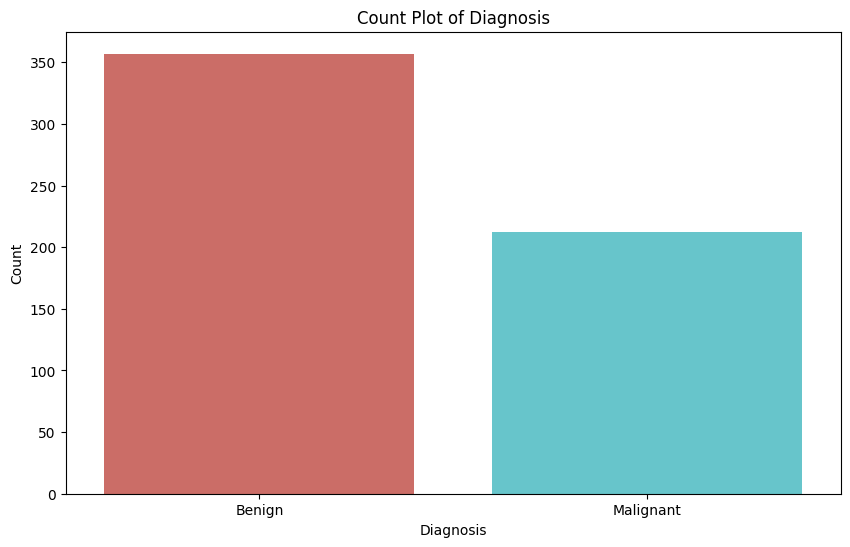

In [40]:
df_barplot = pd.DataFrame({'Diagnosis': counts.index, 'Count': counts.values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Diagnosis', y='Count', data=df_barplot, palette='hls')
plt.title('Count Plot of Diagnosis')
plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

features_scaled = scaler.transform(df)
features_scaled = pd.DataFrame(data=features_scaled, columns=df.columns)

df_scaled = pd.concat([features_scaled, data.target], axis=1)

In [98]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target', var_name='features', value_name='value')
df_scaled_melt.head()

,target,features,value
0,0,mean radius,1.097064
1,0,mean radius,1.829821
2,0,mean radius,1.579888
3,0,mean radius,-0.768909
4,0,mean radius,1.750297


In [99]:
def violin_plot(features, name):
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    data = df_scaled_melt.query(query)

    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=90)
    plt.title(name)
    plt.xlabel("Признаки")
    plt.ylabel("Стандартизированные значения")

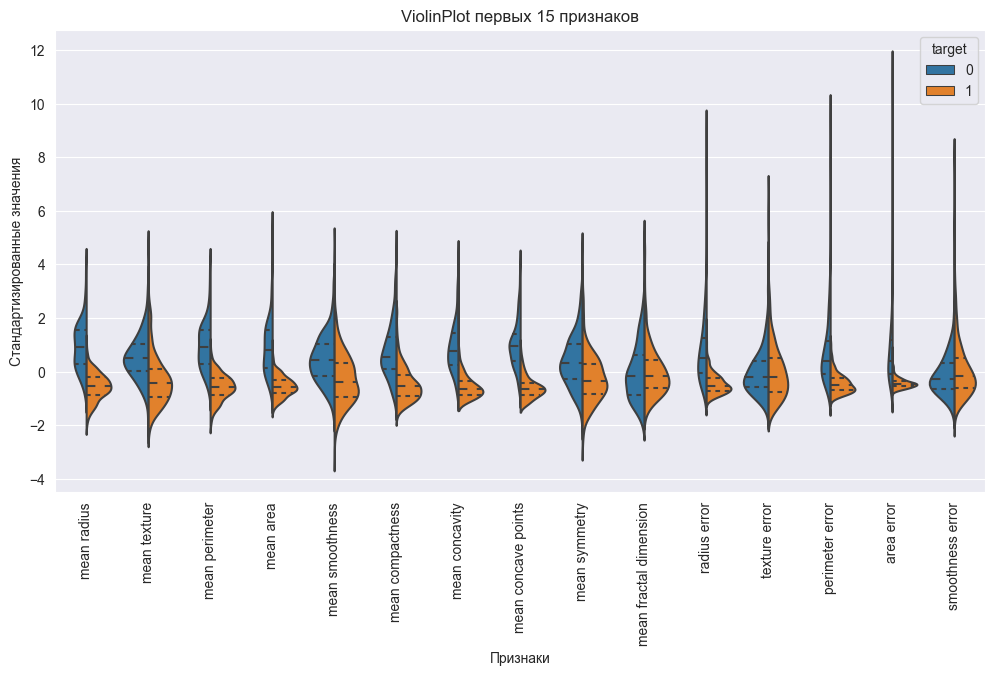

In [ ]:
violin_plot(df.columns[0:15], "ViolinPlot первых 15 признаков")

In [ ]:
def box_plot(features, name):
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    data = df_scaled_melt.query(query)

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=90)
    plt.title(name)
    plt.xlabel("Признаки")
    plt.ylabel("Стандартизированные значения")

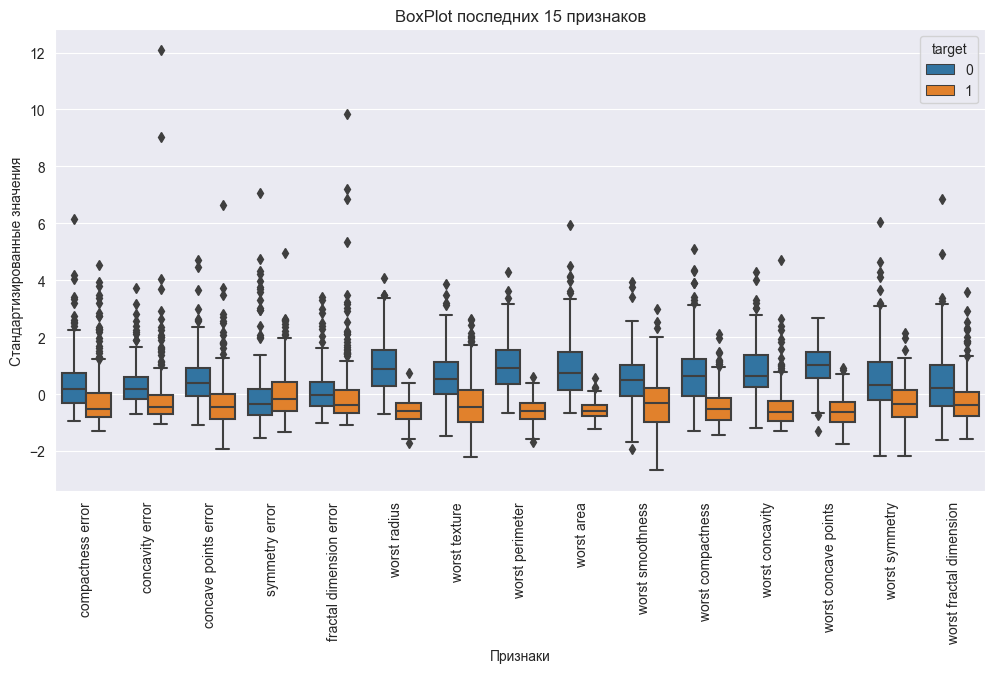

In [ ]:
box_plot(df.columns[15:30], "BoxPlot последних 15 признаков")

### Из графиков можно сделать вывод, что значения некоторых признаков сильно отличаются, то есть для злокачественных опухолей значения чаще всего выше, чем для доброкачественных. Это может быть полезно для классификации, например, такие признаки, как <strong>mean radius, mean area, mean concave points, worst radius, worst perimeter, worst area, worst concave points</strong>.
### Однако признаки, которые по своим распределениям значений выглядят схожими, не подходят для классификации, такие как <strong>mean smoothness, mean symmetry, mean fractual dimension, smoothness error</strong>.
### Также есть признаки, у которых распределения значений похожи, значит скорее всего они сильно коррелируют друг с другом. А именно <strong>mean perimeter</strong> и <strong>mean area</strong>, <strong>mean concavity</strong> и <strong>mean concave points</strong>, <strong>worst symmetry</strong> и <strong>worst fractal dimension</strong>. Например:

<Figure size 600x600 with 0 Axes>

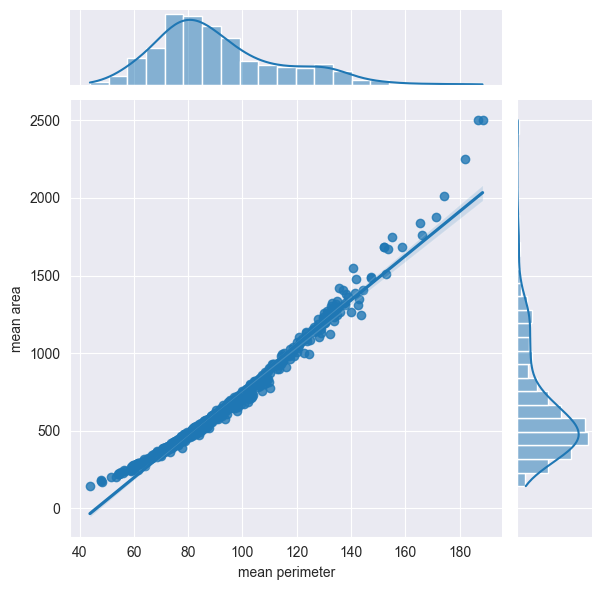

In [ ]:
def correlation(feature):
    plt.figure(figsize=(6, 6))
    sns.jointplot(x=df[(feature[0])], y=df[(feature[1])], kind='reg')

correlation(['mean perimeter', 'mean area'])
plt.show()

<Figure size 600x600 with 0 Axes>

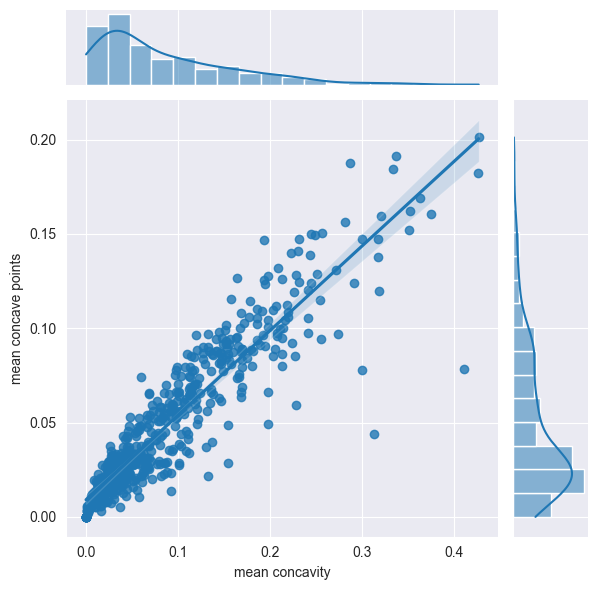

In [ ]:
correlation(['mean concavity', 'mean concave points'])

<Figure size 600x600 with 0 Axes>

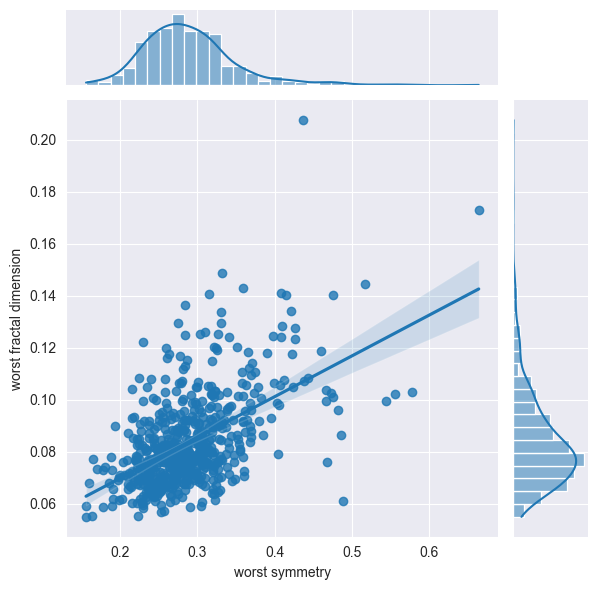

In [ ]:
correlation(['worst symmetry', 'worst fractal dimension'])

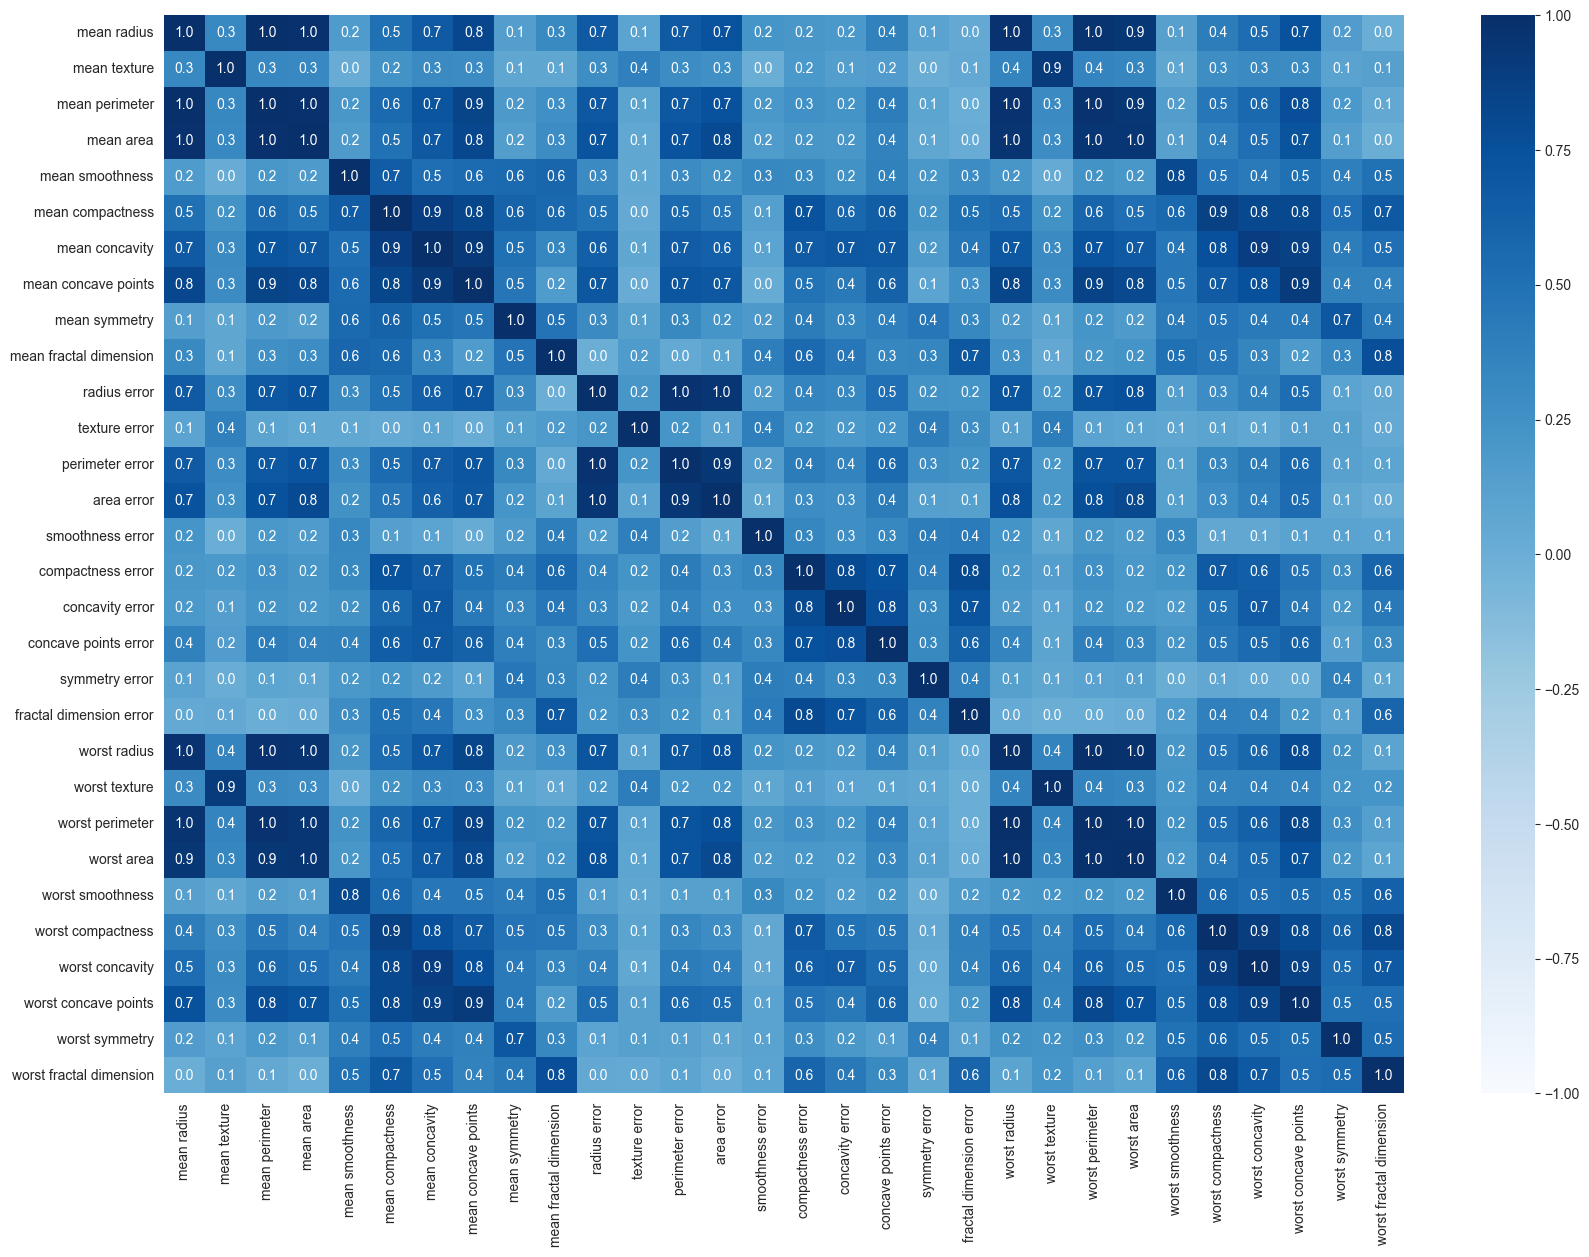

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(data=abs(corr), annot=True, fmt='.1f', cmap='Blues', vmin=-1, vmax=1)
plt.show()

<Axes: >

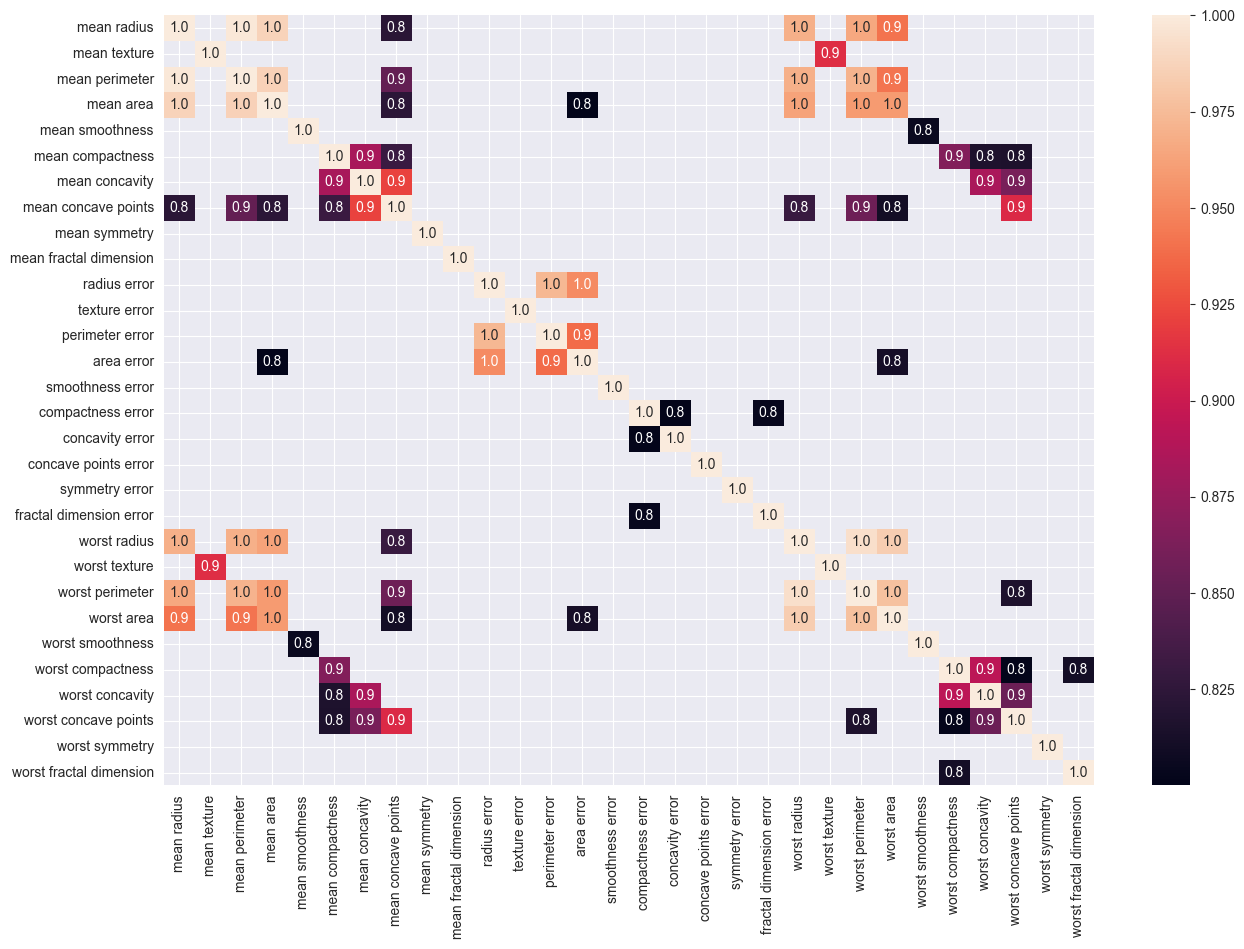

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr[corr > 0.8], annot=True,
            fmt='.1f')

In [100]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=4)
feature_selection.fit(df, df_target)
selected_features = df.columns[feature_selection.get_support()]
print("Selected features are: ", list(selected_features))

Selected features are:  ['mean area', 'area error', 'worst perimeter', 'worst area']


In [101]:
X = pd.DataFrame(feature_selection.transform(df), columns=selected_features)
X.head()

,mean area,area error,worst perimeter,worst area
0,1001.0,153.40,184.60,2019.0
1,1326.0,74.08,158.80,1956.0
2,1203.0,94.03,152.50,1709.0
3,386.1,27.23,98.87,567.7
4,1297.0,94.44,152.20,1575.0


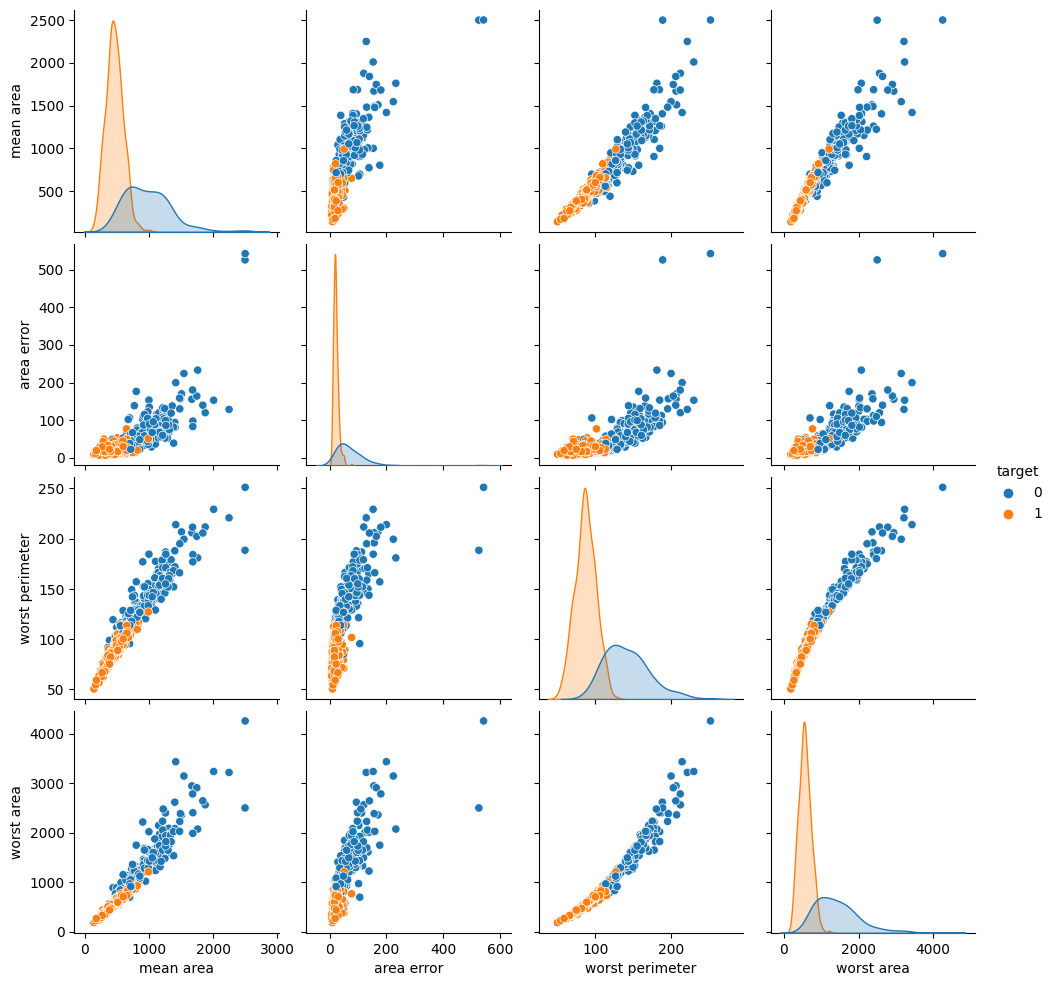

In [102]:
sns.pairplot(pd.concat([X, data.target], axis=1), hue='target')

In [50]:
from sklearn.model_selection import train_test_split

y = data.target
X = df_scaled.loc[:, ['mean area', 'area error', 'worst perimeter', 'worst area']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 4)
(188, 4)
(381,)
(188,)


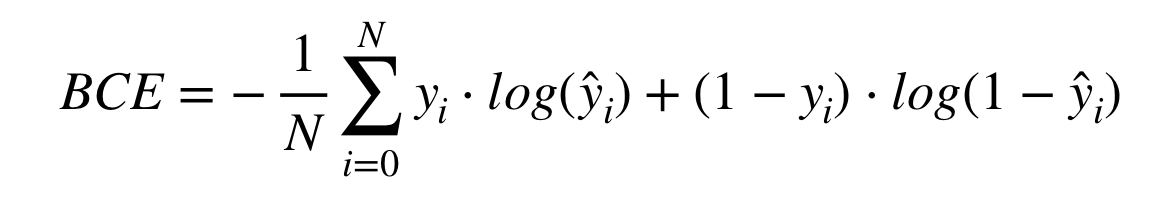
### Упрощенная формула производной
$ \frac{\partial L}{\partial w} = \frac{1}{n} X^T (\hat{y} - y) $

In [51]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_pred, y_train):
    return -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))

def logistic_regression(X_train, y_train, learning_rate = 0.01, num_iterations=100):
    n = len(X_train)
    
    w1 = np.random.rand(X_train.shape[1]) * 0.01
    w0 = 0.01
    losses = []

    for  _ in range(num_iterations):
        z = np.dot(X_train, w1) + w0
        y_pred = sigmoid(z)

        loss = binary_cross_entropy_loss(y_pred, y_train)
        losses.append(loss)

        dw0 = (1/n) * np.sum(y_pred - y_train)
        dw1 = (1/n) * np.dot(X_train.T, (y_pred - y_train))

        w1 = w1 - learning_rate*dw1
        w0 = w0 - learning_rate*dw0

    plt.plot(range(num_iterations), losses)
    plt.show()

    return w0, w1

def test_reg(X_test, w1, w0):
    probabilities = sigmoid(np.dot(X_test, w1) + w0)
    return np.array([1 if p > 0.5 else 0 for p in probabilities])

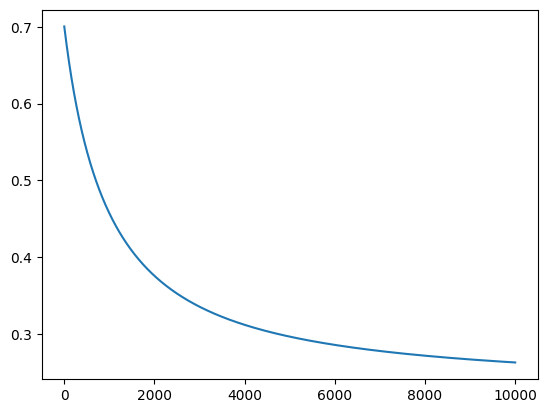

0.312393844139699 [-0.72478309 -0.58242852 -0.99535298 -0.83746699]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1]


In [52]:
w0, w1 = logistic_regression(X_train=X_train, y_train=y_train, learning_rate=0.001, num_iterations=10000)
print(w0, w1)
y_pred = test_reg(X_test, w1, w0)
print(y_pred)

### Напоминание - 0 - злокачественная опухоль, 1 - доброкачественная. В данном случае внимание стоит акцентировать на <strong>полноту</strong>, потому что нам важнее минимизировать риск пропустить хотя бы одну злокачественную опухоль.

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(y_test, y_pred)
print(conf)

rep = classification_report(y_test, y_pred)
print(rep)

[[ 56  11]
 [  0 121]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        67
           1       0.92      1.00      0.96       121

    accuracy                           0.94       188
   macro avg       0.96      0.92      0.93       188
weighted avg       0.95      0.94      0.94       188



In [12]:
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)
print(y_pred)

Logistic Regression model accuracy (in %): 95.2127659574468
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]


In [55]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

rep = classification_report(y_test, y_pred)
print(rep)

[[ 61   6]
 [  3 118]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.95      0.98      0.96       121

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188

